# Importing necessary libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_1 = pd.read_csv(r"C:\Users\ashka\Downloads\DA202\bb2f8633-7052-46d8-a1ca-8d0642c79573.tsv", sep='\t')
df_1.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [29]:
df_1['last_review'].describe()

count            25209
unique             190
top       June 23 2019
freq              1413
Name: last_review, dtype: object

# Correcting the date format
#copying the data in a new column and evaluating the date time objects

In [2]:
df_1['last_review_corrected'] = pd.to_datetime(df_1['last_review'], errors='coerce')
df_1.dtypes

listing_id                        int64
host_name                        object
last_review                      object
last_review_corrected    datetime64[ns]
dtype: object

In [3]:
min_max = df_1['last_review'].agg(['min', 'max'])
min_max

min    April 01 2019
max      May 31 2019
Name: last_review, dtype: object

In [4]:
df_1.isna().sum()

listing_id               0
host_name                8
last_review              0
last_review_corrected    0
dtype: int64

# Deleted the now unnecessary datetime column, renaming the data frame and moving to loading the next file

In [5]:
reviews = df_1.copy()
df_2 = pd.read_excel(r"C:\Users\ashka\Downloads\DA202\fd0c7c82-e0b4-4be9-8e07-004c01000d67.xlsx")
df_2.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [7]:
df_2['room_type'].value_counts()

Entire home/apt    8458
Private room       7241
entire home/apt    2665
private room       2248
ENTIRE HOME/APT    2143
PRIVATE ROOM       1867
Shared room         380
shared room         110
SHARED ROOM          97
Name: room_type, dtype: int64

# Normalizing the room types and giving the file an appropriate name

In [8]:
df_2['room_type'] = df_2['room_type'].str.strip()

In [9]:
df_2['room_type'] = df_2['room_type'].str.lower()

In [10]:
df_2['room_type'].value_counts()

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64

In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [12]:
rooms = df_2.copy()

# Moving on to the last file, loading and cleaning.

In [13]:
df_3 = pd.read_csv(r"C:\Users\ashka\Downloads\DA202\8a201e4b-5529-4271-8b8c-65476487ad07.csv")
df_3.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [14]:
df_3['price'] = df_3['price'].str.replace('dollars', '').astype('float')

In [15]:
df_3.describe()

,listing_id,price
count,2.520900e+04,25209.000000
mean,2.068922e+07,141.777936
std,1.102928e+07,147.349137
min,2.595000e+03,0.000000
25%,1.202273e+07,69.000000
50%,2.234391e+07,105.000000
75%,3.037669e+07,175.000000
max,3.645581e+07,7500.000000


In [16]:
prices = df_3.copy()

# joining the tables.

In [17]:
merged_1 = rooms.merge(prices, on="listing_id").merge(reviews, on="listing_id")
merged_1.head(10)

,listing_id,description,room_type,price,nbhood_full,host_name,last_review,last_review_corrected
0,2595,Skylit Midtown Castle,entire home/apt,225.0,"Manhattan, Midtown",Jennifer,May 21 2019,2019-05-21
1,3831,Cozy Entire Floor of Brownstone,entire home/apt,89.0,"Brooklyn, Clinton Hill",LisaRoxanne,July 05 2019,2019-07-05
2,5099,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,200.0,"Manhattan, Murray Hill",Chris,June 22 2019,2019-06-22
3,5178,Large Furnished Room Near B'way,private room,79.0,"Manhattan, Hell's Kitchen",Shunichi,June 24 2019,2019-06-24
4,5238,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,150.0,"Manhattan, Chinatown",Ben,June 09 2019,2019-06-09
5,5295,Beautiful 1br on Upper West Side,entire home/apt,135.0,"Manhattan, Upper West Side",Lena,June 22 2019,2019-06-22
6,5441,Central Manhattan/near Broadway,private room,85.0,"Manhattan, Hell's Kitchen",Kate,June 23 2019,2019-06-23
7,5803,"Lovely Room 1, Garden, Best Area, Legal rental",private room,89.0,"Brooklyn, South Slope",Laurie,June 24 2019,2019-06-24
8,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,private room,85.0,"Manhattan, Upper West Side",Claudio,July 05 2019,2019-07-05
9,6848,Only 2 stops to Manhattan studio,entire home/apt,140.0,"Brooklyn, Williamsburg",Allen & Irina,June 29 2019,2019-06-29


In [18]:
df = merged_1.copy()
df.isna().sum()

listing_id                0
description              10
room_type                 0
price                     0
nbhood_full               0
host_name                 8
last_review               0
last_review_corrected     0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.dtypes

listing_id                        int64
description                      object
room_type                        object
price                           float64
nbhood_full                      object
host_name                        object
last_review                      object
last_review_corrected    datetime64[ns]
dtype: object

In [21]:
average_price = prices['price'].mean()
average_price

141.7779364512674

In [22]:
df['price'].describe()

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64

# Preliminary visualizations to understand the data

C:\Users\ashka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


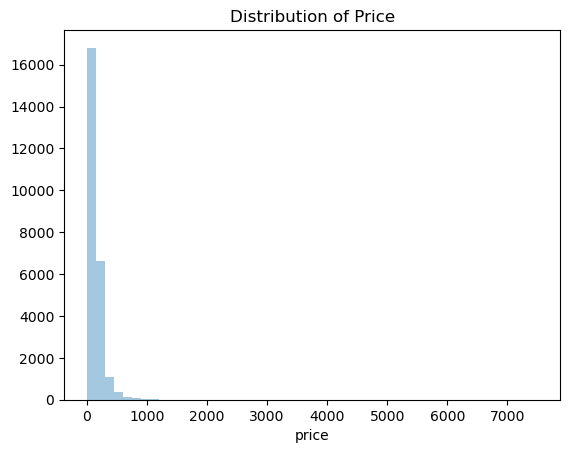

In [23]:
sns.distplot(df['price'], kde=False)
plt.title('Distribution of Price')
plt.show()

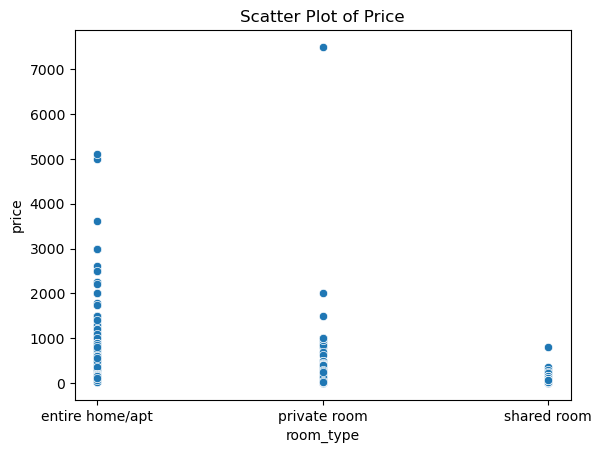

In [24]:
df['room_type'] = df['room_type'].astype('category')
sns.scatterplot(x='room_type', y='price', data=df)
plt.title('Scatter Plot of Price')
plt.show()

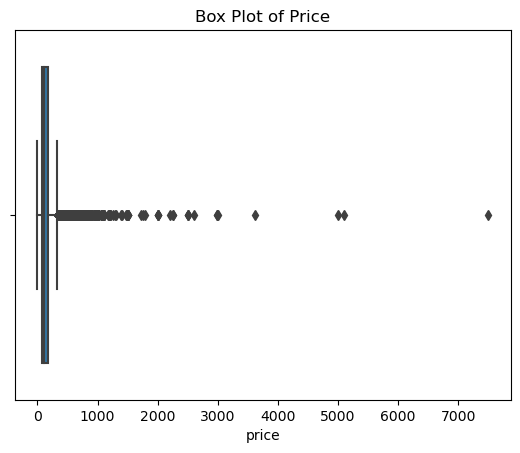

In [25]:
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price')
plt.show()

In [26]:
top_10_prices = df.nlargest(10, 'price')
top_10_prices

,listing_id,description,room_type,price,nbhood_full,host_name,last_review,last_review_corrected
23916,34895693,Gem of east Flatbush,private room,7500.0,"Brooklyn, East Flatbush",Sandra,July 07 2019,2019-07-07
22085,33397385,Midtown Manhattan great location (Gramacy park),entire home/apt,5100.0,"Manhattan, Midtown",Debra,June 22 2019,2019-06-22
18430,30035166,4-Floor Unique Event Space 50P Cap. - #10299B,entire home/apt,5000.0,"Manhattan, Harlem",Rasmus,February 23 2019,2019-02-23
21731,33029434,West 84th Street by (Hidden by Airbnb),entire home/apt,3613.0,"Manhattan, Upper West Side",Sally,June 15 2019,2019-06-15
12508,22263855,SPECTACULAR SOHO GREAT ROOM LOFT 6000sq feet,entire home/apt,3000.0,"Manhattan, SoHo",Stephanie,June 30 2019,2019-06-30
24432,35297214,Amazing Chelsea 4BR Loft!,entire home/apt,2995.0,"Manhattan, Chelsea",Viberlyn,June 24 2019,2019-06-24
13528,23860219,Designer's Beautiful 2BR Apartment in NOLITA/SOHO,entire home/apt,2990.0,"Manhattan, Nolita",Ilo And Richard,June 29 2019,2019-06-29
21838,33133321,Majestic Mansion LifeStyle :),entire home/apt,2600.0,"Queens, Bayside",Shah,May 30 2019,2019-05-30
1234,893413,Architecturally Stunning Former Synagogue!,entire home/apt,2500.0,"Manhattan, East Village",Martin,July 01 2019,2019-07-01
14282,25018204,"Paradise Garden, Spa, Steam & Massage Table #1...",entire home/apt,2500.0,"Manhattan, Harlem",Rasmus,June 24 2019,2019-06-24


# Creating price bins to better understand the distribution

In [27]:
# Create the price range bins
bins = [0, 69, 175, 350, float('inf')]
labels = ['Budget', 'Average', 'Expensive', 'Extravagant']

# Filter the data for the Bronx borough
bronx_data = df[df['nbhood_full'].str.contains('Bronx')]

# Create a new column 'price_range' based on the price values
bronx_data['price_range'] = pd.cut(bronx_data['price'], bins=bins, labels=labels)

# Group the data by price range and count the number of listings
result = bronx_data.groupby('price_range').size().reset_index(name='count')

# Print the result
print(result)

   price_range  count
0       Budget    381
1      Average    286
2    Expensive     25
3  Extravagant      5


C:\Users\ashka\AppData\Local\Temp\ipykernel_24040\184855309.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx_data['price_range'] = pd.cut(bronx_data['price'], bins=bins, labels=labels)


# Decided to remove the ouliers and check the mean again

In [28]:
# Calculate the IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Calculate the number of outliers
num_outliers = df.shape[0] - df_filtered.shape[0]

# Calculate the percentage of outliers
percentage_outliers = (num_outliers / df.shape[0]) * 100

# Calculate the mean price without outliers
mean_price = df_filtered['price'].mean()

# Print the number of outliers, percentage of outliers, and the mean price
print("Number of Outliers:", num_outliers)
print("Percentage of Outliers:", percentage_outliers, "%")
print("Mean Price (without outliers):", mean_price)


Number of Outliers: 1326
Percentage of Outliers: 5.260026181125788 %
Mean Price (without outliers): 119.14998115814596
